In [10]:
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image
from typing import TypedDict

class calculatePortfolio(TypedDict):
    amount_usd:float
    total_usd:float
    target_currency:str
    total:float

def calculate_total(state: calculatePortfolio)->calculatePortfolio:
    state['total_usd'] = state['amount_usd'] * 1.15
    return state

def convert_to_pkr(state: calculatePortfolio)->calculatePortfolio:
    state['total'] = state['total_usd'] * 280
    return state

def convert_to_inr(state: calculatePortfolio)->calculatePortfolio:
    state['total'] = state['total_usd'] * 80
    return state

def currency_conversion(state: calculatePortfolio)->str:
    return state['target_currency']



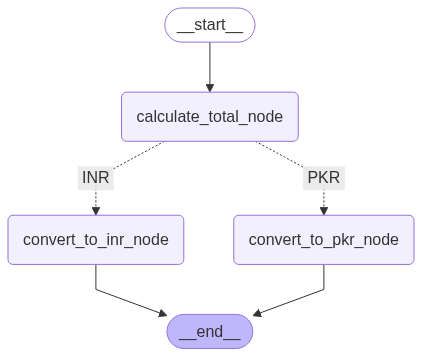

In [11]:
builder = StateGraph(calculatePortfolio)

builder.add_node("calculate_total_node", calculate_total)
builder.add_node("convert_to_pkr_node", convert_to_pkr)
builder.add_node("convert_to_inr_node", convert_to_inr)

builder.add_edge(START, "calculate_total_node")
builder.add_conditional_edges("calculate_total_node", currency_conversion, 
    {"PKR": "convert_to_pkr_node", "INR": "convert_to_inr_node"})
builder.add_edge(["convert_to_pkr_node", "convert_to_inr_node"], END)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))


In [13]:
graph.invoke({"amount_usd": 1000, "target_currency": "INR"})

{'amount_usd': 1000,
 'total_usd': 1150.0,
 'target_currency': 'INR',
 'total': 92000.0}